In [1]:
%matplotlib inline

In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
INF = 1000000000
n = 2
max_it = 1500
min_alpha = 0.1
max_alpha = 10

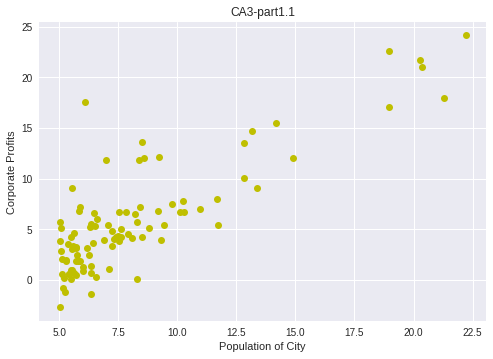

In [4]:
matrix = np.genfromtxt("part1data1.txt",delimiter = ',')
NUM_OF_DATA = len(matrix)

X = (matrix[:,0]).reshape((1,NUM_OF_DATA)).T
X = np.concatenate((np.ones((1,NUM_OF_DATA)), X.T)).T
Y = (matrix[:,1])

XX = np.copy(X)
YY = np.copy(Y)

theta = np.ones(n)
plt.plot(X[:,1], Y, 'yo')
plt.xlabel('Population of City')
plt.ylabel('Corporate Profits')
plt.title('CA3-part1.1')

In [5]:
x_min = X.min(0)
x_max = X.max(0)
x_mean = X.mean(0)
def feature_scale( feature_num, a):
    return (a - x_mean[feature_num]) / (x_max[feature_num] - x_min[feature_num])

In [6]:
def feature_scaling_all(x):
    for j in range(1,n):
        for i in range(0,len(x)):
            x[i][j] = feature_scale(j, x[i][j])

In [7]:
def Incode_features_scaling(vec,theta):
    ans = theta[0]
    for i in range(1,n):
        ans += feature_scale(i , vec[i]) * theta[i]
    return ans

In [8]:
def linear_regression(x , y , n , max_a , min_a):
    J = []
    m = NUM_OF_DATA
    theta = np.ones(n)
    xT = x.transpose()
    prev_j = -1
    count_it = 0
    exit = False
    while count_it < max_it :
        alpha = (max_a+min_a)/2
        count_it += 1
        h = np.dot(x , theta)
        loss = h - y
        gradient = np.dot(xT , loss)
        theta = theta - alpha * gradient / m
        j = np.sum(loss ** 2) / (2*m)
        J.append(j)
        if prev_j != -1 :
            if prev_j < j :
                J = []
                max_a = alpha
                theta = np.ones(n)
                prev_j = -1
                count_it = 0
        prev_j = j;
        if exit == True:
            count_it = max_it
    return theta , J

In [9]:
feature_scaling_all(X)

In [10]:
def draw_line(theta):
    a = [5,Incode_features_scaling([1,5],theta)]
    b = [30,Incode_features_scaling([1,30],theta)]
    plt.plot([ a[0], b[0] ], [ a[1], b[1] ], 'k-', lw=1)

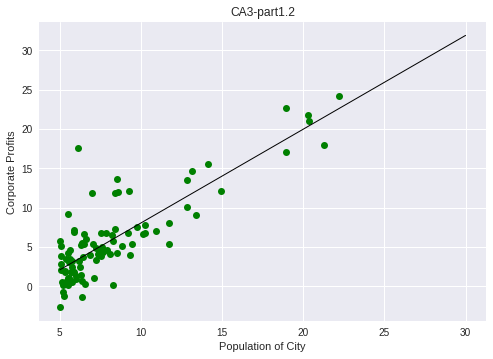

In [11]:
theta , J = linear_regression(X ,Y ,n, max_alpha , min_alpha)
plt.plot(XX[:,1], YY, 'go')
draw_line(theta)
plt.xlabel('Population of City')
plt.ylabel('Corporate Profits')
plt.title('CA3-part1.2')

مقدار هزینه ی نهایی

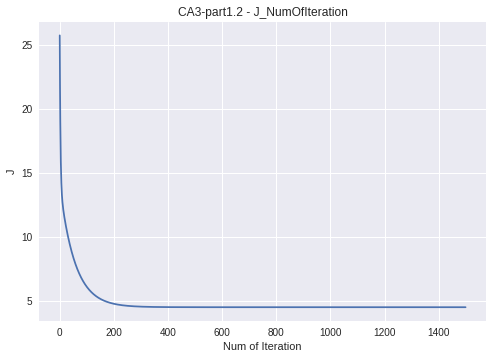

In [12]:
plt.plot(J)
plt.xlabel('Num of Iteration')
plt.ylabel('J')
plt.title('CA3-part1.2 - J_NumOfIteration')

به تصویر کشیدن تابع هزینه (امتیازی)

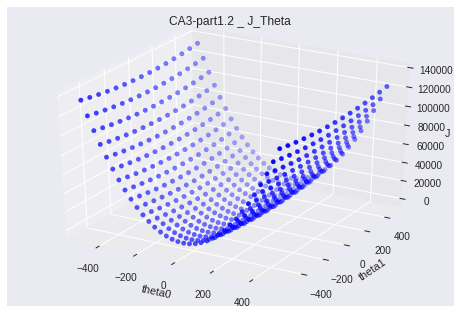

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

t0 = []
t1 = []
J = []

for i in range(-500,500,30):
    for j in range(-500,500,70):
        t0 += [i]
        t1 += [j]
        J += [(np.sum((np.dot(X , [i,j]) - Y) ** 2) / (2*NUM_OF_DATA))]
        
ax.scatter(t0, t1, J, c= 'b' , marker = 'o')


ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J')
plt.title('CA3-part1.2 _ J_Theta')
plt.show()